Kurset gennemgår grundlæggende Python-kode, der kan få dig i gang med at bruge programmering som redskab til tekstbehandling, kvantitative analyser og tekst- og datamining.

Mere teknisk fortalt gennemgår vi begreber som variabler, værdier, datatyperne tekststrenge, lister og loops. 

Vi gennemgår et eksempel på, hvordan man kan hente tekstdata, klargøre data og bruge biblioteket jieba. Jieba anvendes til at opdele tekst i ord og undersøtter traditionelt kinesisk. 

_Kilde: https://github.com/fxsjy/jieba_

# Import af biblioteker

In [1]:
# Til navigation på computerne
import os

# Webscrape biblioteker
from bs4 import BeautifulSoup
import requests

# Til klargøring og analyse
import jieba
import nltk
import re

Vi laver en variabel, som vi bruger til at gemme url'en til den sider, som vi vil webscrabe. 

Vi skal scrape denne wikipidiaside: 反对逃犯条例修订草案运动

In [2]:
# gem url'en i en variabel
url_zh = 'https://zh.wikipedia.org/zh-cn/%E5%8F%8D%E5%B0%8D%E9%80%83%E7%8A%AF%E6%A2%9D%E4%BE%8B%E4%BF%AE%E8%A8%82%E8%8D%89%E6%A1%88%E9%81%8B%E5%8B%95'

Vi indsætter et af variablenavnene i request.get('url') nedenfor.

In [3]:
# hent data
page = requests.get(url_zh)

# scrape websiden
soup = BeautifulSoup(page.content, 'html.parser')

In [5]:
# find alle 'headline3 og paragraph-tags'
tags = soup.find_all(['h1', 'h3', 'p'])

# læs teksten ud af p_tags og 'join' den returnerede liste i variablen 'text'
text = ' '.join([p.get_text() for p in tags]).strip()

In [6]:
print (text)

反对逃犯条例修订草案运动 其他诉求
 海外反应
 中央政府：
 香港政府：
 反对《逃犯条例修订草案》运动（英语：Anti-Extradition Law Amendment Bill Movement），是指香港自2019年3月15日开始、6月9日大规模爆发的社会运动，逾万人被捕。此次运动并无统一的领导，主要以社交媒体号召的方式组织，运动支持者以游行示威、集会、静坐、唱歌、呐喊、“三罢”行动、设置连侬墙、不合作运动、堵塞道路干道[56]、“起底”、破坏商铺、建筑物、大学、及公共设施等一系列行为，向香港特别行政区政府抗议其提出《逃犯条例》修订草案。根据示威者的观点，该草案容许将香港的犯罪嫌疑人引渡至中国内地受审；而反对者因不信任中国大陆的司法制度而担忧将嫌疑人引渡至大陆会出现不公平审讯的情况，进而损害香港在“一国两制”及《基本法》下所列明的独立司法管辖权地位。
 香港众志早在2019年3月15日就已于政府总部发起要求撤回《逃犯条例》修订的静坐。在3月至4月期间，民间人权阵线两度发起示威游行。6月9日，民阵再度发起游行，主办方宣称有超过100万名市民参与。但特区政府不顾强烈反对，继续强行推动修例；6月12日，香港立法会继续将条例恢复二读辩论，触发了四万名市民围在了立法会大楼外示威。为了阻止条例在立法会通过，示威者与警方发生了激烈冲突。事后主办方指责警方滥用职权及过度使用武力。此后示威者提出“完全撤回《逃犯条例》修订草案、撤回暴动定性（612）、撤回所有示威者控罪、追究警队滥权、行政长官林郑月娥辞职下台”等“五大诉求”。6月16日，民间人权阵线发起更大规模的游行，再次引发了大量市民参与这次游行。主办方宣称游行人数超过了200万人，是“香港有史以来参与人数最多的游行”。7月1日游行期间，部分示威者占领立法会综合大楼，其后并将林郑月娥下台的诉求更改为“立即实现行政长官和立法会的真双普选”，实现真正的民主普选诉求。
 之后，示威者几乎每周发起常态抗议活动。在7月21日，游行后发生了元朗袭击事件，这次事件成为运动的标志性事件，也使运动发生转折，示威者与警方之间的冲突加剧。8月中旬，示威者两度瘫痪香港国际机场。8月18日，民阵再度举办大规模和平集会，参与8·18集会的人数超过170万人。8月31日，太子站事件后令示威行动升级。9月4日下午，行政长官林郑月娥宣布四项行动，并动议撤回

# Klargøring af tekst 

## Rensning

Teksten bestå af latinske bogstaver og kinesiske tegn.

Ønsker man at sortere de latiske bogstaver fra kan man bruge koden nedenfor.

_Kilder:_
    
_https://stackoverflow.com/questions/2718196/find-all-chinese-text-in-a-string-using-python-and-regex_

_https://unicode-table.com/en/blocks/cjk-unified-ideographs/_

In [7]:
chinese_list = re.findall(r'[\u4e00-\u9fff]+', text)

In [8]:
print (chinese_list)

['反对逃犯条例修订草案运动', '其他诉求', '海外反应', '中央政府', '香港政府', '反对', '逃犯条例修订草案', '运动', '英语', '是指香港自', '年', '月', '日开始', '月', '日大规模爆发的社会运动', '逾万人被捕', '此次运动并无统一的领导', '主要以社交媒体号召的方式组织', '运动支持者以游行示威', '集会', '静坐', '唱歌', '呐喊', '三罢', '行动', '设置连侬墙', '不合作运动', '堵塞道路干道', '起底', '破坏商铺', '建筑物', '大学', '及公共设施等一系列行为', '向香港特别行政区政府抗议其提出', '逃犯条例', '修订草案', '根据示威者的观点', '该草案容许将香港的犯罪嫌疑人引渡至中国内地受审', '而反对者因不信任中国大陆的司法制度而担忧将嫌疑人引渡至大陆会出现不公平审讯的情况', '进而损害香港在', '一国两制', '及', '基本法', '下所列明的独立司法管辖权地位', '香港众志早在', '年', '月', '日就已于政府总部发起要求撤回', '逃犯条例', '修订的静坐', '在', '月至', '月期间', '民间人权阵线两度发起示威游行', '月', '日', '民阵再度发起游行', '主办方宣称有超过', '万名市民参与', '但特区政府不顾强烈反对', '继续强行推动修例', '月', '日', '香港立法会继续将条例恢复二读辩论', '触发了四万名市民围在了立法会大楼外示威', '为了阻止条例在立法会通过', '示威者与警方发生了激烈冲突', '事后主办方指责警方滥用职权及过度使用武力', '此后示威者提出', '完全撤回', '逃犯条例', '修订草案', '撤回暴动定性', '撤回所有示威者控罪', '追究警队滥权', '行政长官林郑月娥辞职下台', '等', '五大诉求', '月', '日', '民间人权阵线发起更大规模的游行', '再次引发了大量市民参与这次游行', '主办方宣称游行人数超过了', '万人', '是', '香港有史以来参与人数最多的游行', '月', '日游行期间', '部分示威者占领立法会综合大楼', '其后并将林郑月娥下台的诉求更改为', '立即实现行政长官和立法会的真双普选', '实现真正的民主普选

Listen kan man efterfølgende samle til en tekststreng igen med .join()

_Kilde: "https://www.w3schools.com/python/ref_string_join.asp"_   

In [9]:
chinese_text = ' '.join(chinese_list)

In [10]:
print (chinese_text)

反对逃犯条例修订草案运动 其他诉求 海外反应 中央政府 香港政府 反对 逃犯条例修订草案 运动 英语 是指香港自 年 月 日开始 月 日大规模爆发的社会运动 逾万人被捕 此次运动并无统一的领导 主要以社交媒体号召的方式组织 运动支持者以游行示威 集会 静坐 唱歌 呐喊 三罢 行动 设置连侬墙 不合作运动 堵塞道路干道 起底 破坏商铺 建筑物 大学 及公共设施等一系列行为 向香港特别行政区政府抗议其提出 逃犯条例 修订草案 根据示威者的观点 该草案容许将香港的犯罪嫌疑人引渡至中国内地受审 而反对者因不信任中国大陆的司法制度而担忧将嫌疑人引渡至大陆会出现不公平审讯的情况 进而损害香港在 一国两制 及 基本法 下所列明的独立司法管辖权地位 香港众志早在 年 月 日就已于政府总部发起要求撤回 逃犯条例 修订的静坐 在 月至 月期间 民间人权阵线两度发起示威游行 月 日 民阵再度发起游行 主办方宣称有超过 万名市民参与 但特区政府不顾强烈反对 继续强行推动修例 月 日 香港立法会继续将条例恢复二读辩论 触发了四万名市民围在了立法会大楼外示威 为了阻止条例在立法会通过 示威者与警方发生了激烈冲突 事后主办方指责警方滥用职权及过度使用武力 此后示威者提出 完全撤回 逃犯条例 修订草案 撤回暴动定性 撤回所有示威者控罪 追究警队滥权 行政长官林郑月娥辞职下台 等 五大诉求 月 日 民间人权阵线发起更大规模的游行 再次引发了大量市民参与这次游行 主办方宣称游行人数超过了 万人 是 香港有史以来参与人数最多的游行 月 日游行期间 部分示威者占领立法会综合大楼 其后并将林郑月娥下台的诉求更改为 立即实现行政长官和立法会的真双普选 实现真正的民主普选诉求 之后 示威者几乎每周发起常态抗议活动 在 月 日 游行后发生了元朗袭击事件 这次事件成为运动的标志性事件 也使运动发生转折 示威者与警方之间的冲突加剧 月中旬 示威者两度瘫痪香港国际机场 月 日 民阵再度举办大规模和平集会 参与 集会的人数超过 万人 月 日 太子站事件后令示威行动升级 月 日下午 行政长官林郑月娥宣布四项行动 并动议撤回 逃犯条例 修订草案 但拒绝成立独立调查委员调查警暴 月 日 全港爆发激烈示威 林郑月娥会同行政会议在同月 日引用 紧急法 制定 禁止蒙面规例 引起更大冲突 示威活动进入 月 随着新一轮的三罢行动被发起 

## Tekstdeling

I jieba.lcut metoden indsætter vi en tekststreng eller, som i dette tilfælde, en variabel som indeholder en tekststreng, og vi styrer cut-tilstanden. L'et i .lcut() henviser til at metoden returerer en liste. 'Cut_all=True' skulle give flest mulige orddelinger af teksten, være hurtig, men mindre præcis. 'Cut_all=False' skulle være mere nøjagtige end den første, og dermed mere velegnet til tekstanalyse. _Kilde: https://github.com/fxsjy/jieba_

In [11]:
seg_list1 = jieba.lcut(chinese_text, cut_all=False)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\lakj\AppData\Local\Temp\jieba.cache
Loading model cost 0.596 seconds.
Prefix dict has been built successfully.


In [12]:
seg_list1

['反对',
 '逃犯',
 '条例',
 '修订',
 '草案',
 '运动',
 ' ',
 '其他',
 '诉求',
 ' ',
 '海外',
 '反应',
 ' ',
 '中央政府',
 ' ',
 '香港政府',
 ' ',
 '反对',
 ' ',
 '逃犯',
 '条例',
 '修订',
 '草案',
 ' ',
 '运动',
 ' ',
 '英语',
 ' ',
 '是',
 '指',
 '香港',
 '自',
 ' ',
 '年',
 ' ',
 '月',
 ' ',
 '日',
 '开始',
 ' ',
 '月',
 ' ',
 '日',
 '大规模',
 '爆发',
 '的',
 '社会',
 '运动',
 ' ',
 '逾万人',
 '被捕',
 ' ',
 '此次',
 '运动',
 '并',
 '无',
 '统一',
 '的',
 '领导',
 ' ',
 '主要',
 '以',
 '社交',
 '媒体',
 '号召',
 '的',
 '方式',
 '组织',
 ' ',
 '运动',
 '支持者',
 '以',
 '游行示威',
 ' ',
 '集会',
 ' ',
 '静坐',
 ' ',
 '唱歌',
 ' ',
 '呐喊',
 ' ',
 '三',
 '罢',
 ' ',
 '行动',
 ' ',
 '设置',
 '连侬',
 '墙',
 ' ',
 '不',
 '合作',
 '运动',
 ' ',
 '堵塞',
 '道路',
 '干道',
 ' ',
 '起底',
 ' ',
 '破坏',
 '商铺',
 ' ',
 '建筑物',
 ' ',
 '大学',
 ' ',
 '及',
 '公共设施',
 '等',
 '一系列',
 '行为',
 ' ',
 '向',
 '香港特别行政区政府',
 '抗议',
 '其',
 '提出',
 ' ',
 '逃犯',
 '条例',
 ' ',
 '修订',
 '草案',
 ' ',
 '根据',
 '示威者',
 '的',
 '观点',
 ' ',
 '该',
 '草案',
 '容许',
 '将',
 '香港',
 '的',
 '犯罪',
 '嫌疑人',
 '引渡',
 '至',
 '中国',
 '内地',
 '受审',
 ' ',
 '而',
 '反对者',
 '因',
 '不',
 '信

Vi får returneret mange felter, der består af 'white_space'.
For at så disse linjer fjernet fra vores data bruger vi 'if' til at sætte en betingelse ind i koden. Vi skriver, hvis vores linjer består af tegn, som ikke er lig med 'white space', så er vi interesseret i at gemme det i vaiablen seg_list2. 

In [13]:
seg_list2 = [i for i in seg_list1 if i != ' ']

In [14]:
print (seg_list2)

['反对', '逃犯', '条例', '修订', '草案', '运动', '其他', '诉求', '海外', '反应', '中央政府', '香港政府', '反对', '逃犯', '条例', '修订', '草案', '运动', '英语', '是', '指', '香港', '自', '年', '月', '日', '开始', '月', '日', '大规模', '爆发', '的', '社会', '运动', '逾万人', '被捕', '此次', '运动', '并', '无', '统一', '的', '领导', '主要', '以', '社交', '媒体', '号召', '的', '方式', '组织', '运动', '支持者', '以', '游行示威', '集会', '静坐', '唱歌', '呐喊', '三', '罢', '行动', '设置', '连侬', '墙', '不', '合作', '运动', '堵塞', '道路', '干道', '起底', '破坏', '商铺', '建筑物', '大学', '及', '公共设施', '等', '一系列', '行为', '向', '香港特别行政区政府', '抗议', '其', '提出', '逃犯', '条例', '修订', '草案', '根据', '示威者', '的', '观点', '该', '草案', '容许', '将', '香港', '的', '犯罪', '嫌疑人', '引渡', '至', '中国', '内地', '受审', '而', '反对者', '因', '不', '信任', '中国', '大陆', '的', '司法制度', '而', '担忧', '将', '嫌疑人', '引渡', '至', '大陆', '会', '出现', '不', '公平', '审讯', '的', '情况', '进而', '损害', '香港', '在', '一国两制', '及', '基本法', '下', '所', '列明', '的', '独立', '司法', '管辖权', '地位', '香港', '众志早', '在', '年', '月', '日', '就', '已于', '政府', '总部', '发起', '要求', '撤回', '逃犯', '条例', '修订', '的', '静坐', '在', '月', '至', '月', '期间', '民间', '人权', '

Som det fremgår ovenfor bliver lister lavet vha. firkantede parenteser ( [ ] ).

Man kan tilgå elementerne i listen ved at referere til indekstallet. Igen kan vi bruge både positive og nagative tal. Husk at i Python er første indextal 0 og ikke 1, hvilket betyder, at vi tilgår det første og det sidste element i listen på denne måde:

In [15]:
print (seg_list2[0])
print (seg_list2[-1])

反对
语言


# Part of Speech Tagging (POS)

Jiebas part of speech tagger returnerer ordene og tags i to forskellige elementer. For at bruge pos-taggeren skal man importere 'import jieba.posseg as pseg'.

Ifølge dokumentationen bruger man pseg efterfuldt af .cut( 'tekst_streng' ).
_Kilde: "4. Part of Speech Tagging https://github.com/fxsjy/jieba"_

Vi får returneret ord og tags. De ligger i .word og .flag. I dokumentationen viser programmøren, hvordan man printer ord og tags, men jeg vil gerne have alle ord og tags gemt som par i en liste. Derfor bruger jeg en tuple, som er en python datatype og tilføjer hvert ord og tag par til en liste, som jeg kalder for 'pos'.
_Kilde: Python Tuples https://www.w3schools.com/python/python_tuples.asp_

In [16]:
import jieba.posseg as pseg
words = pseg.cut(chinese_text)
pos_tags = []
for w in words:
    if w.word > ' ':
        word_tag = tuple((w.word, w.flag))
        pos_tags.append(word_tag)

In [17]:
pos_tags

[('反对', 'd'),
 ('逃犯', 'v'),
 ('条例', 'n'),
 ('修订', 'v'),
 ('草案', 'n'),
 ('运动', 'vn'),
 ('其他', 'r'),
 ('诉求', 'v'),
 ('海外', 's'),
 ('反应', 'vn'),
 ('中央政府', 'nt'),
 ('香港政府', 'nt'),
 ('反对', 'd'),
 ('逃犯', 'v'),
 ('条例', 'n'),
 ('修订', 'v'),
 ('草案', 'n'),
 ('运动', 'vn'),
 ('英语', 'nz'),
 ('是', 'v'),
 ('指', 'n'),
 ('香港', 'ns'),
 ('自', 'p'),
 ('年', 'm'),
 ('月', 'm'),
 ('日', 'm'),
 ('开始', 'v'),
 ('月', 'm'),
 ('日', 'm'),
 ('大规模', 'b'),
 ('爆发', 'v'),
 ('的', 'uj'),
 ('社会', 'n'),
 ('运动', 'vn'),
 ('逾', 'vg'),
 ('万', 'm'),
 ('人', 'n'),
 ('被捕', 'v'),
 ('此次', 'r'),
 ('运动', 'vn'),
 ('并', 'c'),
 ('无', 'v'),
 ('统一', 'vn'),
 ('的', 'uj'),
 ('领导', 'n'),
 ('主要', 'b'),
 ('以', 'p'),
 ('社交', 'n'),
 ('媒体', 'n'),
 ('号召', 'v'),
 ('的', 'uj'),
 ('方式', 'n'),
 ('组织', 'v'),
 ('运动', 'vn'),
 ('支持者', 'n'),
 ('以', 'p'),
 ('游行示威', 'n'),
 ('集会', 'n'),
 ('静坐', 'v'),
 ('唱歌', 'n'),
 ('呐喊', 'v'),
 ('三', 'm'),
 ('罢', 'v'),
 ('行动', 'vn'),
 ('设置', 'vn'),
 ('连侬', 'nr'),
 ('墙', 'n'),
 ('不', 'd'),
 ('合作', 'vn'),
 ('运动', 'vn'),
 ('堵塞', 'v'),


Jeg skriver et for loop, der indeholder en betingelse ('if'). Med loopet gennemgår jeg listen med tuples. Hvis første element i 'tuplen' ([1]) er lig med 'v' tilføjer jeg første element ([0]) til listen 'words'.   

In [18]:
words = []
for item in pos_tags:
    if item[1] == 'v':
        words.append(item[0])

In [19]:
words 

['逃犯',
 '修订',
 '诉求',
 '逃犯',
 '修订',
 '是',
 '开始',
 '爆发',
 '被捕',
 '无',
 '号召',
 '组织',
 '静坐',
 '呐喊',
 '罢',
 '堵塞',
 '干道',
 '起底',
 '破坏',
 '行为',
 '提出',
 '逃犯',
 '修订',
 '容许',
 '引渡',
 '受审',
 '担忧',
 '引渡',
 '会',
 '出现',
 '审讯',
 '损害',
 '下所',
 '独立',
 '发起',
 '要求',
 '撤回',
 '逃犯',
 '修订',
 '静坐',
 '发起',
 '发起',
 '游行',
 '宣称',
 '有',
 '超过',
 '参与',
 '不顾',
 '继续',
 '强行',
 '推动',
 '继续',
 '恢复',
 '读',
 '触发',
 '围在',
 '阻止',
 '发生',
 '指责',
 '使用',
 '提出',
 '撤回',
 '逃犯',
 '修订',
 '撤回',
 '暴动',
 '撤回',
 '控罪',
 '追究',
 '滥权',
 '辞职',
 '下台',
 '诉求',
 '发起',
 '游行',
 '引发',
 '参与',
 '游行',
 '宣称',
 '游行',
 '超过',
 '是',
 '参与',
 '游行',
 '游行',
 '占领',
 '下台',
 '诉求',
 '改为',
 '实现',
 '普选',
 '实现',
 '普选',
 '诉求',
 '发起',
 '游行',
 '发生',
 '袭击',
 '成为',
 '使',
 '发生',
 '转折',
 '加剧',
 '瘫痪',
 '举办',
 '参与',
 '超过',
 '站',
 '宣布',
 '撤回',
 '逃犯',
 '修订',
 '拒绝',
 '成立',
 '独立',
 '爆发',
 '引用',
 '制定',
 '禁止',
 '引起',
 '进入',
 '罢',
 '发起',
 '理大',
 '发生',
 '受伤',
 '反修',
 '例',
 '举行',
 '选举',
 '创新',
 '取得',
 '赢得',
 '超过',
 '选举',
 '建制',
 '派',
 '遭到',
 '促使',
 '介入',
 '宣布',
 '选举',
 '争取',
 '诉求',
 '继续

Før vi ser på fordelingen af ord med 'v'-tags, er vi nødt til at gøre noget ved at python som default ikke kan printet kinesiske tegn. Derfor importerer vi 'matplotlib.pyplot as plt' og ændrer font.family til "Microsoft YaHei".

In [20]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Microsoft YaHei"

Herefter kan vi importere nltk og anvende nltk.FreqDist().

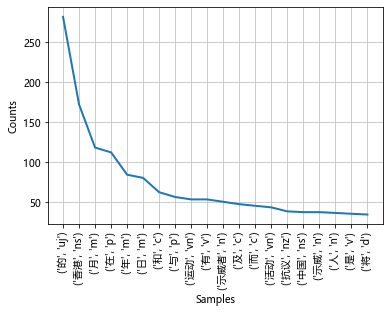

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
import nltk
nltk.FreqDist(pos_tags).plot(20)

#### Opgave: prøv at udskifte 'v' med andre tags.

## Stopord

Stopord er småord, som ofte ikke er betydningsbærende ord.

Vi har defor brug for at indlæse en stopordsliste. Den ligger i mappen stopwords, og den er fundet på jiebas github side: https://github.com/fxsjy/jieba/tree/master/extra_dict.

Vi bruger os biblioteket til at navigere over i stopordsmappen. Hver kan det blive lidt indviklet, fordi når det kommer til at navigere mellem mapper, så er der en lille forskel på om, man sidder med en mac eller en pc.

Jeg sidder med en pc og skal bruge '\\' som separator i min sti til min mappe, men hvis du har en  mac, så skal du bruge '/' som din separator i i stedet. 

In [22]:
# find din separator
os.sep

'\\'

In [23]:
# find din nuværende mappe
os.getcwd()

'C:\\Users\\lakj\\kinastudier efterår 2022\\Lektion2'

In [24]:
# find ud af, hvad der ligger i mappen
os.listdir()

['.ipynb_checkpoints',
 'Redskaber til klargøring og analyse af tekst på kinesisk.ipynb',
 'stopwords']

In [25]:
# flyt dig hen i mappen med stopord
os.chdir('.\\stopwords')

In [26]:
# find din nuværende mappe igen
os.getcwd()

'C:\\Users\\lakj\\kinastudier efterår 2022\\Lektion2\\stopwords'

In [27]:
# find ud af, hvad der ligger i mappen - igen
os.listdir()

['stopwords_ch.txt']

Vi er klar til at indlæse vores stopord.

In [28]:
sw_ch = open('stopwords_ch.txt', 'r', encoding='utf-8-sig').read().split()

In [29]:
sw_ch

['$',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '?',
 '_',
 '“',
 '”',
 '、',
 '。',
 '《',
 '》',
 '一',
 '一些',
 '一何',
 '一切',
 '一则',
 '一方面',
 '一旦',
 '一来',
 '一样',
 '一般',
 '一转眼',
 '万一',
 '上',
 '上下',
 '下',
 '不',
 '不仅',
 '不但',
 '不光',
 '不单',
 '不只',
 '不外乎',
 '不如',
 '不妨',
 '不尽',
 '不尽然',
 '不得',
 '不怕',
 '不惟',
 '不成',
 '不拘',
 '不料',
 '不是',
 '不比',
 '不然',
 '不特',
 '不独',
 '不管',
 '不至于',
 '不若',
 '不论',
 '不过',
 '不问',
 '与',
 '与其',
 '与其说',
 '与否',
 '与此同时',
 '且',
 '且不说',
 '且说',
 '两者',
 '个',
 '个别',
 '临',
 '为',
 '为了',
 '为什么',
 '为何',
 '为止',
 '为此',
 '为着',
 '乃',
 '乃至',
 '乃至于',
 '么',
 '之',
 '之一',
 '之所以',
 '之类',
 '乌乎',
 '乎',
 '乘',
 '也',
 '也好',
 '也罢',
 '了',
 '二来',
 '于',
 '于是',
 '于是乎',
 '云云',
 '云尔',
 '些',
 '亦',
 '人',
 '人们',
 '人家',
 '什么',
 '什么样',
 '今',
 '介于',
 '仍',
 '仍旧',
 '从',
 '从此',
 '从而',
 '他',
 '他人',
 '他们',
 '以',
 '以上',
 '以为',
 '以便',
 '以免',
 '以及',
 '以故',
 '以期',
 '以来',
 '以至',
 '以至于',
 '以致',
 '们',
 '任',
 '任何',
 '任凭',
 '似的',
 '但',
 '但凡',
 '但是',
 '何',
 '何以',
 '何况',
 '何处',
 '何时',
 '余外',
 '作为',
 '你',
 '你们'

Nu kan alle teksterne bliver filtreret for stopord.

In [30]:
filtered_tokens = []
for word in seg_list2:
    if word not in sw_ch:
        filtered_tokens.append(word)

Med en ny ordliste, der ikke længere indeholder stopord, kan vi få overblik over, hvilke betydningsbærende ord, der flyder mest.

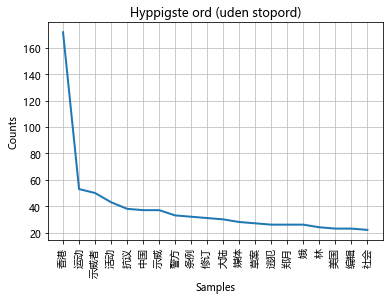

In [31]:
fdist_filtered = nltk.FreqDist(filtered_tokens).plot(20, title='Hyppigste ord (uden stopord)')

In [32]:
long_tokens = []

for word in filtered_tokens:
    if len(word) > 4:
        long_tokens.append(word)

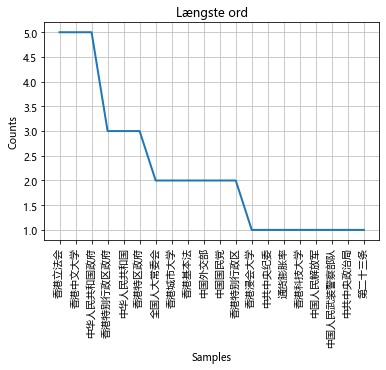

In [33]:
fdist_filtered = nltk.FreqDist(long_tokens).plot(20, title='Længste ord')

# NLTK metoder

Jeg har benyttet nltk mange gange, men aldrig med kinesisk tekst. Vi eksperimenterer og opretter et nltk-tekstobjekt, som burde give os mulighed for at anvende forskellige nltk-metoder.

In [34]:
nltk_text = nltk.Text(seg_list2)

collocation_list() returnerer en liste over de mest almindelige ordpar i teksten. Bemærk, at i nogle versioner af Python virker collocation_list() ikke. Hvis dette er tilfældet, prøv _collocations()_ i stedet.

In [35]:
nltk_text.collocation_list()

[('总领事馆', '外交官'), ('电视广播', '有限公司'), ('总书记', '习近平'), ('香港中文大学', '学生会')]

Concordance()-metoden returnerer konteksten af et specifikt udtryk. Længden af output kan ændres med parametrene i width og lines.

In [37]:
nltk_text.concordance('和', lines=30, width=40)

Displaying 30 of 63 matches:
诉求 更 改为 立即 实现 行政长官 和 立法会 的 真双 普选 实现 真正 
民主派 在 选举 中 大胜 建制 派 和 乡 事 派 则 遭到 史无前例 大败
 并 刊宪 生效 触发 反对者 反弹 和 国际 社会 关注 促使 美国 宣布 
浸会大学 协理 副校长 外务 杨志刚 和 部分 传媒 亦 称呼 是 场 运动 
亥 香港 事变 多数 非 华语 媒体 和 香港 英文 媒体 包括 南华早报 则
华人民共和国 官方 媒体 如 新华社 和 香港 亲中 媒体 如 大公报 文汇报
外 自 年 月 起 亲中 人士 政府 和 建制 媒体 将 这场 示威 简称 为
程序 上 由于 无法 选出 建制 派 和 民主派 都 承认 的 主席 香港立法
个 委员会 分别 获得 民主派 议员 和 建制 派 议员 支持 双方 僵持不下
此同时 欧洲 与 美国 的 政 商界 和 国际 社会 亦 广泛 关注 逃犯 条
金融中心 但 较 高 的 通货膨胀率 和 货币 升值 导致 其 在 全球 生活
相关 行业 分别 占 本地 生产总值 和 反观 零售 餐饮 住宿 服务业 仅 
观 零售 餐饮 住宿 服务业 仅 占 和 但 金融 及 保险业 虽 只有 就业
 没有 做 得 不够 而是 人口老化 和 经济 发展 等 情况 造成 的 根据
盾 得到 政治 的 刺激 例如 房屋 和 土地 供应 贫富悬殊 向上 流动 困
求 改为 实现 双 普选 即 立法会 和 行政长官 均 由 自由 的 直接 选
 活动 扩大 为 表达 一系列 政治 和 社会 不满 的 运动 运动 焦点 也
终 是 没有 代表 群众 的 领导人 和 组织 的 自发 运动 该 示威运动 
在 没有 明显 统一 的 组织 带领 和 呼吁 下 示威者 透过 互联网 平台
媒体 口耳相传 等 传播 有关 抗议 和 其他 公民 不 服从 行动 的 讯息
民 不 服从 行动 的 讯息 示威者 和 警察 都 把 识别 面部 和 身份 
示威者 和 警察 都 把 识别 面部 和 身份 变成 一种 工具 其中 政府 
 还会 使用 激光 笔射 向 建筑物 和 警方 警方 指 这 是 一种 武器 
者 发展 出 许多 流行 文化 标语 和 艺术创作 例如 向 日本 动漫 电影
敬 许多 融入 电影 

For at identificere ord, der optræder i en lignende kontekst, kan vi bruge metoden similar().

Jeg har en forestilling om at metoden giver bedre resultater jo længere teksten er.

In [38]:
nltk_text.similar('和')

及 至 与 选举 形容 日至 指称 杀死


generate() metoden kan du bruge til at genere mere eller mindre sammenhængende tekst med udgangspunkt i en eksisterende tekst.

In [39]:
text_gen = nltk_text.generate(150)

Building ngram index...


流动 困难 经济 结构 单一 地产 霸权 社会 公义 及 公众 参与 决策 等 让 越来越 多 不满 的 运动 运动 焦点 也 转往 关注
警察 滥权 在 运动 过程 中 抗议者 汲取 年 并未 成功 的 雨伞 革命 中 的 公众 活动 中 蒙面 于 次日 零时 正式 生效
教育局 亦 发 公文 给 香港 各级 学校 要求 通知 学生 与 家长 年 月 曾 参考 香港 示威者 所 采用 之 手法 而 形成 黑群
示威 形式 出现 的 黑色 暴力 修订 法案 编辑 年 月 日 全港 爆发 激烈 示威 林 郑月 娥 听取 林 郑月 娥 辞职 下台 等
五大 诉求 月 日 公布 本年度 第三季 本地 生产总值 和 反观 零售 餐饮 及 住宿服务 行业 养活 就业人口 但 工资 中位数 达
万元 平均 薪金 从 年 至今 累积 增长 达 相比之下 虽然 零售 餐饮 及 住宿服务 行业 养活 就业人口 但 工资 中位数 仅仅
稍高于 万元 不及 金融业
